In [4]:
import pandas as pd
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect,Integer


In [5]:
# Import data and convert it into DF
constr_1_csv = "./Resources/csv/constructor_results.csv"
constr_2_csv = "./Resources/csv/constructors.csv"
constr_3_csv = "./Resources/csv/races.csv"
constr_1_df = pd.read_csv(constr_1_csv)
constr_2_df = pd.read_csv(constr_2_csv)
constr_3_df = pd.read_csv(constr_3_csv)
# Merge the data in one
pre_contr_df = pd.merge(constr_1_df, constr_2_df, on="constructorId")
final_contr_df = pd.merge(pre_contr_df, constr_3_df, on="raceId")


# Filter only the needed columns
final_c1_df = final_contr_df[["constructorId","points","name_x","nationality","year"]]
final_c1_df = final_c1_df.rename(columns={"name_x": "constr_name"})
final_c1_df

# Create an empty data frame
c1_df = pd.DataFrame()

# In the last 10 years.. 
final_c1_df = final_c1_df[(final_c1_df['year'] >= 2010) & (final_c1_df['year'] < 2021)]
final_c1_df

    
group_cons = final_c1_df.groupby(['year', 'constr_name', 'nationality', 'constructorId']).sum()['points']
group_cons
group_cons = group_cons.to_frame()
group_cons
group_cons = group_cons.reset_index()
group_cons

# rename columns for later use in data base
group_cons = group_cons.rename(columns={'constr_name':'name', 'constructorId':'constructorid'})


group_cons.to_csv('./Output/F1.csv')

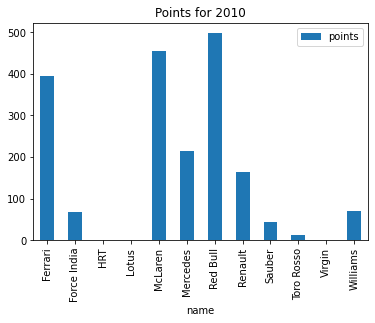

In [7]:
import matplotlib.pyplot as plt
x_values = group_cons[group_cons['year'] == 2010]

x_values.plot.bar(x='name', y='points', title='Points for 2010');


In [14]:
f1 = pd.DataFrame()

In [15]:
# Connect to local data base
from password import password
connect_str = f"postgres:{password}@localhost:5432/Formula1" 
engine = create_engine(f"postgresql://{connect_str}")

In [16]:
# Check for tables
engine.table_names()

<ipython-input-16-73dc095f7130>:2: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  engine.table_names()


['f1']

In [17]:
# Use pandas to load csv converted DataFrame into Database
f1.to_sql(name="f1", con=engine, if_exists="append", index=False)

In [18]:
# Confirm data has been added by querying c1_df table
pd.read_sql_query("select * from f1", con=engine)

,id,year,name,nationality,constructorid,points
0,0,2010,Ferrari,Italian,6,396.0
1,1,2010,Force India,Indian,10,68.0
2,2,2010,HRT,Spanish,164,0.0
3,3,2010,Lotus,Malaysian,205,0.0
4,4,2010,McLaren,British,1,454.0
...,...,...,...,...,...,...
115,115,2020,Mercedes,German,131,573.0
116,116,2020,Racing Point,British,211,210.0
117,117,2020,Red Bull,Austrian,9,319.0
118,118,2020,Renault,French,4,181.0
